In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snc

In [59]:
# 일별 기온과 서울지역대기지수 평균 자료

air_quality = pd.read_csv("data/is_all_mean_T.csv")
air_quality.tail()

,Date,SO2,NO2,O3,CO,PM10,PM2.5,T
1080,2019/12/27,0.003433,0.028083,0.018195,0.556500,34.030000,24.853333,-1.7
1081,2019/12/28,0.003710,0.043712,0.005945,0.677167,42.831667,25.313333,1.1
1082,2019/12/29,0.003337,0.037145,0.008980,0.641333,44.428333,27.306667,3.8
1083,2019/12/30,0.003272,0.031195,0.012347,0.628500,38.031667,27.060000,2.7
1084,2019/12/31,0.002880,0.017532,0.020642,0.399333,25.448333,14.786667,-7.9


In [60]:
air_quality.dtypes

Date      object
SO2      float64
NO2      float64
O3       float64
CO       float64
PM10     float64
PM2.5    float64
T        float64
dtype: object

In [61]:
from datetime import datetime
Date=[]
for i in air_quality['Date']:
    Date.append(datetime.strptime(i, '%Y/%m/%d'))
Date

[datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2017, 1, 2, 0, 0),
 datetime.datetime(2017, 1, 3, 0, 0),
 datetime.datetime(2017, 1, 4, 0, 0),
 datetime.datetime(2017, 1, 5, 0, 0),
 datetime.datetime(2017, 1, 6, 0, 0),
 datetime.datetime(2017, 1, 7, 0, 0),
 datetime.datetime(2017, 1, 8, 0, 0),
 datetime.datetime(2017, 1, 9, 0, 0),
 datetime.datetime(2017, 1, 10, 0, 0),
 datetime.datetime(2017, 1, 11, 0, 0),
 datetime.datetime(2017, 1, 12, 0, 0),
 datetime.datetime(2017, 1, 13, 0, 0),
 datetime.datetime(2017, 1, 14, 0, 0),
 datetime.datetime(2017, 1, 15, 0, 0),
 datetime.datetime(2017, 1, 16, 0, 0),
 datetime.datetime(2017, 1, 17, 0, 0),
 datetime.datetime(2017, 1, 18, 0, 0),
 datetime.datetime(2017, 1, 19, 0, 0),
 datetime.datetime(2017, 1, 20, 0, 0),
 datetime.datetime(2017, 1, 21, 0, 0),
 datetime.datetime(2017, 1, 22, 0, 0),
 datetime.datetime(2017, 1, 23, 0, 0),
 datetime.datetime(2017, 1, 24, 0, 0),
 datetime.datetime(2017, 1, 25, 0, 0),
 datetime.datetime(2017, 1, 26, 0,

In [62]:
date=pd.Series(Date)
date

0      2017-01-01
1      2017-01-02
2      2017-01-03
3      2017-01-04
4      2017-01-05
          ...    
1080   2019-12-27
1081   2019-12-28
1082   2019-12-29
1083   2019-12-30
1084   2019-12-31
Length: 1085, dtype: datetime64[ns]

In [63]:
# 날짜를 데이터처리의 인덱스로 사용하기 위해 숫자로 변경

air_quality['Date']=pd.to_numeric(date)
air_quality['Date']

0       1483228800000000000
1       1483315200000000000
2       1483401600000000000
3       1483488000000000000
4       1483574400000000000
               ...         
1080    1577404800000000000
1081    1577491200000000000
1082    1577577600000000000
1083    1577664000000000000
1084    1577750400000000000
Name: Date, Length: 1085, dtype: int64

In [64]:
# MinMaxScaler는 변동 모두 다른 인덱스를 처리하기 쉽게 해당 값을 최소 0에서  최대 1사이의 값으로 변환합니다.

from sklearn.preprocessing import MinMaxScaler

In [65]:
air_quality.keys()

Index(['Date', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5', 'T'], dtype='object')

In [66]:
num = air_quality.keys()
scaler = MinMaxScaler()
scaler.fit(air_quality[num])
air_quality[num] = scaler.transform(air_quality[num])
air_quality[num]

,Date,SO2,NO2,O3,CO,PM10,PM2.5,T
0,0.000000,0.981039,0.756173,0.703979,0.684454,0.307404,0.393839,0.360825
1,0.000914,0.976563,0.728101,0.743652,0.619919,0.443394,0.550900,0.408247
2,0.001828,0.966320,0.731470,0.725383,0.521868,0.313112,0.354769,0.346392
3,0.002742,0.983448,0.769080,0.720521,0.610768,0.213035,0.228017,0.385567
4,0.003656,0.978582,0.721507,0.730978,0.452341,0.133585,0.135824,0.383505
...,...,...,...,...,...,...,...,...
1080,0.996344,0.980099,0.702989,0.762536,0.381150,0.124177,0.155843,0.270103
1081,0.997258,0.981445,0.752815,0.716895,0.467198,0.161532,0.159273,0.327835
1082,0.998172,0.979628,0.731879,0.728202,0.441645,0.168309,0.174135,0.383505
1083,0.999086,0.979312,0.712909,0.740746,0.432493,0.141160,0.172296,0.360825


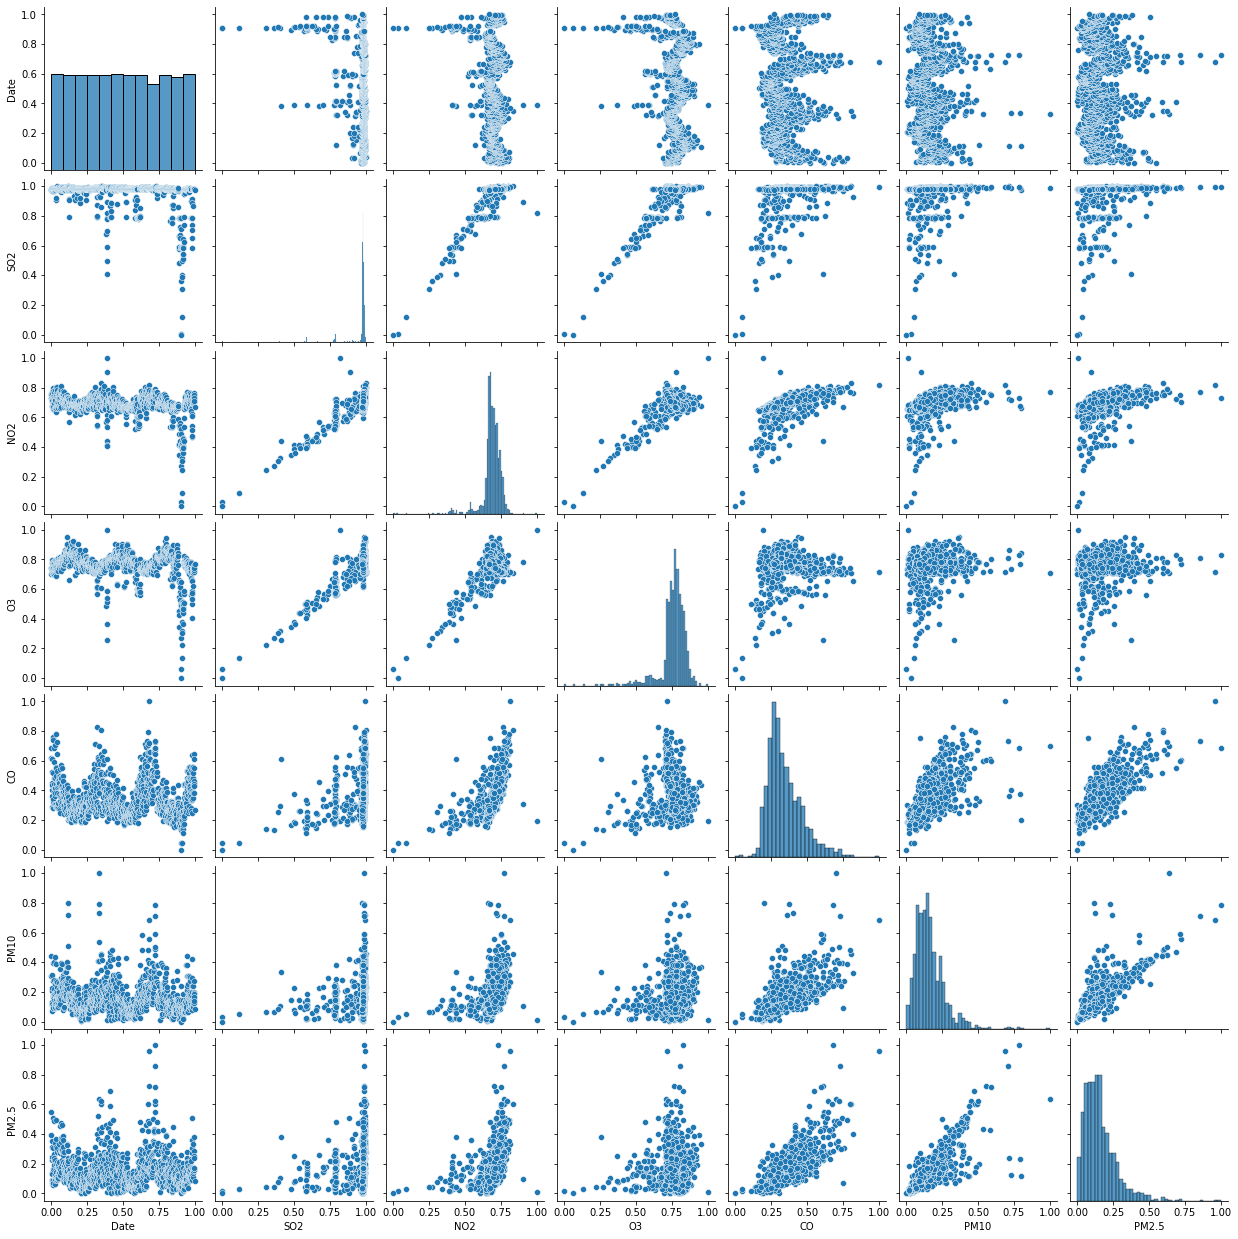

In [67]:
# 어떤 데이터가 선형(linear)인지를 확인하기 위해 pairplot으로 시각화하였습니다.
# 이를 통해 대기질의 원소에 따른 상관관계를 확인할 수 있습니다.

snc.pairplot(air_quality[['Date','SO2','NO2','O3','CO','PM10','PM2.5']], diag_kind ='auto')

In [68]:
# 온도 T는 대기질지수의 값을 예측하는 데 사용할 수 있기 때문에 온도를 활용하여 계산합니다.

features=air_quality
target=air_quality['T']
target

0       0.360825
1       0.408247
2       0.346392
3       0.385567
4       0.383505
          ...   
1080    0.270103
1081    0.327835
1082    0.383505
1083    0.360825
1084    0.142268
Name: T, Length: 1085, dtype: float64

In [69]:
# 상관관계를 분석합니다. 상관관계가 동일하면 1, 전혀 다르면 0, 반대방향으로 동일하면 -1의 값을 갖습니다

air_quality2 = air_quality.corr('pearson')
air_quality2

,Date,SO2,NO2,O3,CO,PM10,PM2.5,T
Date,1.000000,-0.262218,-0.261751,-0.239031,-0.061128,-0.080936,-0.023582,0.096669
SO2,-0.262218,1.000000,0.861667,0.844693,0.234264,0.151687,0.125017,-0.087010
NO2,-0.261751,0.861667,1.000000,0.650407,0.573334,0.362489,0.381048,-0.250142
O3,-0.239031,0.844693,0.650407,1.000000,-0.048180,0.106887,0.060999,0.193279
CO,-0.061128,0.234264,0.573334,-0.048180,1.000000,0.642527,0.751510,-0.501463
PM10,-0.080936,0.151687,0.362489,0.106887,0.642527,1.000000,0.807851,-0.261774
PM2.5,-0.023582,0.125017,0.381048,0.060999,0.751510,0.807851,1.000000,-0.216540
T,0.096669,-0.087010,-0.250142,0.193279,-0.501463,-0.261774,-0.216540,1.000000


In [70]:
abs(air_quality2['T']).sort_values(ascending=False)

T        1.000000
CO       0.501463
PM10     0.261774
NO2      0.250142
PM2.5    0.216540
O3       0.193279
Date     0.096669
SO2      0.087010
Name: T, dtype: float64

<AxesSubplot:>

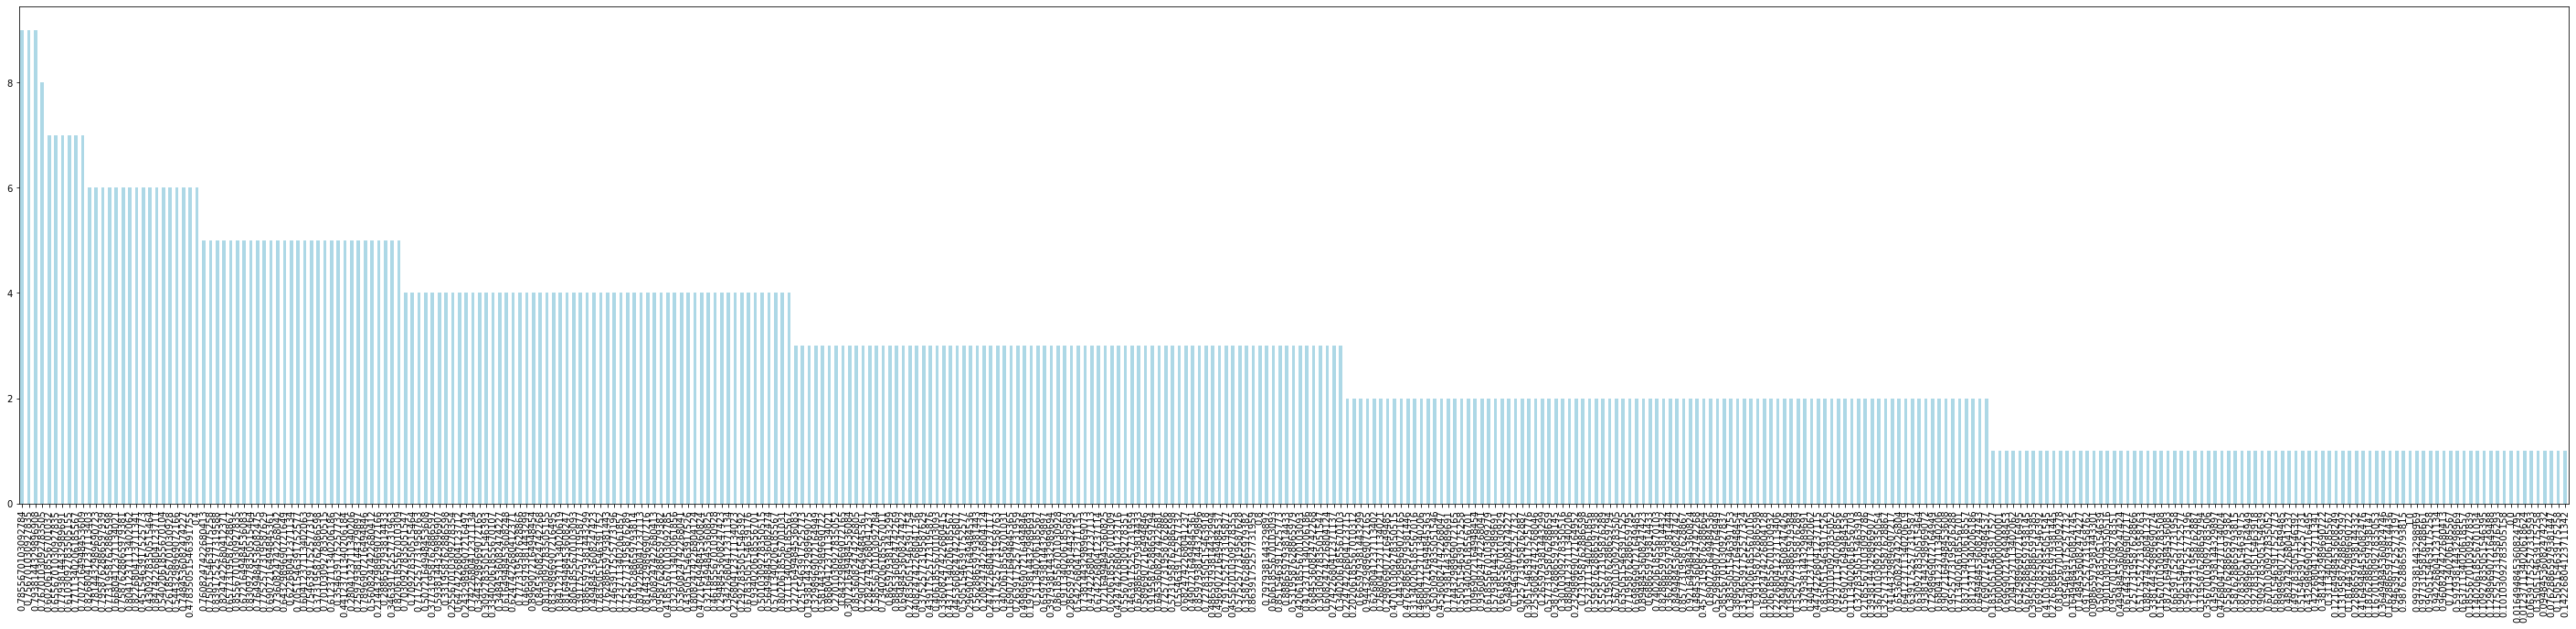

In [71]:
# 온도에 대해 같은 값들이 몇개인지를 보여줍니다.

air_quality['T'].value_counts().plot(kind='bar', color='lightblue',figsize=(50,10))

In [49]:
# 최종 결과의 정확성을 위해 상관관계가 낮은 값을 갖는 행을 제거

features=features.drop('Date',axis=1)
features=features.drop('T',axis=1)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, target)
y_test.tail()

119     0.703093
822     0.501031
503     0.668041
1068    0.414433
831     0.600000
Name: T, dtype: float64

## Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(normalize=True)

In [54]:
print("Predicted values:", regressor.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape

Predicted values: [0.60878663 0.41613296 0.61816158 0.32196406 0.60600339 0.45696658
 0.60307512 0.73498085 0.637342   0.62637901 0.45692871 0.69498653
 0.71759908 0.68352345 0.60403146 0.63617016 0.69172464 0.42277724
 0.54533564 0.61285754 0.6980771  0.69566247 0.3533411  0.59184391
 0.42086743 0.44626461 0.61573789 0.56511619 0.63461399 0.7896989
 0.62058721 0.66672211 0.73802472 0.57946124 0.57455694 0.59379652
 0.65263979 0.87640363 0.71681975 0.62423112 0.43221761 0.4611143
 0.7602487  0.46094019 0.34389221 0.5709867  0.70084067 0.69535615
 0.64697132 0.71097697 0.66139059 0.54295786 0.47877438 0.61174035
 0.71962165 0.63205494 0.59157831 0.70195957 0.72149897 0.31740899
 0.58985017 0.68830603 0.45351363 0.31953536 0.53454272 0.62538316
 0.6599344  0.69252903 0.5997991  0.57077896 0.57501283 0.64071958
 0.33593942 0.5353708  0.50113302 0.66379374 0.57524642 0.60947229
 0.61207584 0.55692715 0.6191429  0.42759694 0.79177249 0.7297681
 0.63179852 0.71342234 0.55250794 0.73881696 0.

(272,)

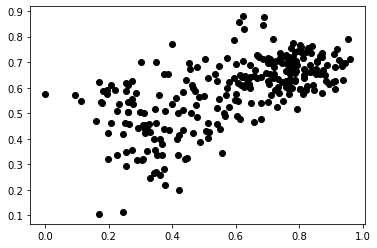

In [55]:
plt.scatter(y_test, y_pred, color='black')
plt.show()